In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:

label=[]

path=[]
fish_dir='/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label




# TÜM BENZERSİZ BALIK TÜRLERİ LİSTELENDİ

In [3]:
from sklearn.model_selection import train_test_split
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Input
print(np.unique(data['label'].values)) 

['Black Sea Sprat' 'Gilt-Head Bream' 'Hourse Mackerel' 'Red Mullet'
 'Red Sea Bream' 'Sea Bass' 'Shrimp' 'Striped Red Mullet' 'Trout']


# HEAD İLE VERİNİN İLK 5 ELEMANI ALINDI

In [13]:
print(data.head())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


# İNFO İLE VARİ HAKKINDA BİLGİLERE ULAŞILDI

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
None


# VERİ TANIMLAMASI

In [6]:
print(data.describe())

                                                     path            label
count                                                9000             9000
unique                                               9000                9
top     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
freq                                                    1             1000


# MATPLOTLİB İLE VERİ GÖRSELLLEŞTİRME

/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png


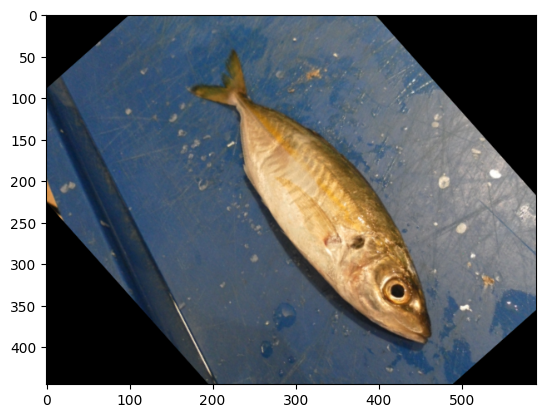

In [7]:
ilk_foto_path = data['path'].iloc[0]
print(ilk_foto_path)
foto=img.imread(ilk_foto_path)
plt.imshow(foto)
plt.show()


# MODEL TRAİN VE TEST SPLİTLERİNE AYRILDI

In [8]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

print(X_train.shape)

path    object
dtype: object
(7200, 1)


VERİ HAKKINDA BOYUT İÇERİK İNCELEMESİ

In [9]:
unique_classes = y.unique()
num_classes = len(unique_classes)

print("Benzersiz Sınıflar:", unique_classes)
print("Sınıf Sayısı:", num_classes)
print("y_train shape:", y_train.shape)  

Benzersiz Sınıflar: ['Hourse Mackerel' 'Black Sea Sprat' 'Sea Bass' 'Red Mullet' 'Trout'
 'Striped Red Mullet' 'Shrimp' 'Gilt-Head Bream' 'Red Sea Bream']
Sınıf Sayısı: 9
y_train shape: (7200,)


# HİPERPARAMETRE OPTİMİZASYONU

# 

# Burada çeşitli değerler değiştirilerek en iyi sonuç elde edilmeye çalışıldı.Activation fonksiyonu değiştitildi.

In [34]:
### X_train = pd.get_dummies(X_train)
## Aşagıda değerler pandas ile kullanılabilir forma dönüştürüldü.
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
X_val = pd.get_dummies(y_val)

X_val = pd.get_dummies(X_val)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
nodes_değis=[128,32,64]
dropout_değiş=[0.1,0.3,0.5]
activation_değiş=['relu', 'sigmoid',"tanh"]
best_accuracy = [0]
best_activation = None
best_nodes = None
#best_dropout = None

for activation in activation_değiş:
 for nodes in nodes_değis:
  for dropout in dropout_değiş:
    ##SİNİR AĞI OLUŞTURULDU    
   model = Sequential()
   model.add(Input(shape=(X_train.shape[1],))) 
   model.add(Dense(128, activation=activation))  # Gizli katman
   model.add(Dropout(0.5))
   model.add(Dense(64, activation=activation))   # Gizli katman
   model.add(Dropout(0.5))
   model.add(Dense(y_train.shape[1], activation='softmax'))
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##KAYIP VE DOĞRULUK TANIMLAMALARI YAPILDI
   train_loss = history.history['loss']
   val_loss = history.history['val_loss']
   train_accuracy = history.history['accuracy']
   val_accuracy = history.history['val_accuracy']
   test_loss, test_accuracy = model.evaluate(X_train, y_train)
   print(f'Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}')
     ##EN İYİ DOĞRULUK DEĞERİNİ BULMAK İÇİN FOR DÖNGÜSÜ KULLANILDI
if val_accuracy > best_accuracy:
  best_accuracy = val_accuracy  
  best_activation = activation
  best_nodes = nodes
  best_dropout=dropout

print(f'En iyi doğruluk: {best_accuracy[0]} (En iyi değeri veren Aktivasyon Fonksiyonu: {best_activation})')
print(f'En iyi doğruluk: {best_accuracy[0]} (En iyi değeri veren düğüm: {best_nodes})')
print(f'En iyi doğruluk: {best_accuracy[0]} (En iyi değeri veren dropout: {best_dropout})')

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1158 - loss: 2.1991 - val_accuracy: 0.1128 - val_loss: 2.1974
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1073 - loss: 2.1986 - val_accuracy: 0.0994 - val_loss: 2.1979
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1159 - loss: 2.1978 - val_accuracy: 0.0994 - val_loss: 2.1980
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1183 - loss: 2.1957 - val_accuracy: 0.1061 - val_loss: 2.1982
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1223 - loss: 2.1957 - val_accuracy: 0.0994 - val_loss: 2.1976
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1228 - loss: 2.1955 - val_accuracy: 0.1128 - val_loss: 2.1976
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1194 - loss: 2.1972
Test Kaybı: 2.1971895694732666, Test Doğruluğu: 0.11375000327825546
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1140 - loss: 2.1973
Test Kay

# compile

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 

# activation='relu'

In [20]:
from keras.layers import Dropout
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(128, activation='relu'))  # Gizli katman
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))   # Gizli katman
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [25]:
X_train = pd.get_dummies(X_train)
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
X_val = pd.get_dummies(y_val)

X_val = pd.get_dummies(X_val)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1081 - loss: 2.1983 - val_accuracy: 0.0994 - val_loss: 2.1978
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1473 - loss: 2.1896 - val_accuracy: 0.1083 - val_loss: 2.1995
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2345 - loss: 2.1282 - val_accuracy: 0.1161 - val_loss: 2.2045
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4953 - loss: 1.7493 - val_accuracy: 0.0994 - val_loss: 2.2174
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7819 - loss: 0.8939 - val_accuracy: 0.0994 - val_loss: 2.2252
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9034 - loss: 0.4016 - val_accuracy: 0.1172 - val_loss: 2.2717


In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2140 - loss: 2.1906
Test Kaybı: 2.1906163692474365, Test Doğruluğu: 0.21513888239860535


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**ACTİVATİON SİGMOİD YAPILDIĞINDA**

# 

# activation='sigmoid'# 

In [27]:
from keras.layers import Dropout
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(128, activation='sigmoid'))  # Gizli katman
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))   # Gizli katman
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:

X_train = pd.get_dummies(X_train)
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
X_val = pd.get_dummies(y_val)

X_val = pd.get_dummies(X_val)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1124 - loss: 2.3763 - val_accuracy: 0.1083 - val_loss: 2.1997
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1102 - loss: 2.2193 - val_accuracy: 0.1117 - val_loss: 2.1978
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1165 - loss: 2.2051 - val_accuracy: 0.0994 - val_loss: 2.1987
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1131 - loss: 2.2033 - val_accuracy: 0.1161 - val_loss: 2.1973
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1134 - loss: 2.1989 - val_accuracy: 0.1061 - val_loss: 2.1979
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1136 - loss: 2.1982 - val_accuracy: 0.1128 - val_loss: 2.1975
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1225 - loss: 2.1951 - val_accuracy: 0.0994 - val_loss: 2.1982
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1240 - loss: 2.1977 - val_accu

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2094 - loss: 2.1956
Test Kaybı: 2.1954431533813477, Test Doğruluğu: 0.21763889491558075


#  Kayıp fonkisyonunun iterasyonlar arası grafiği

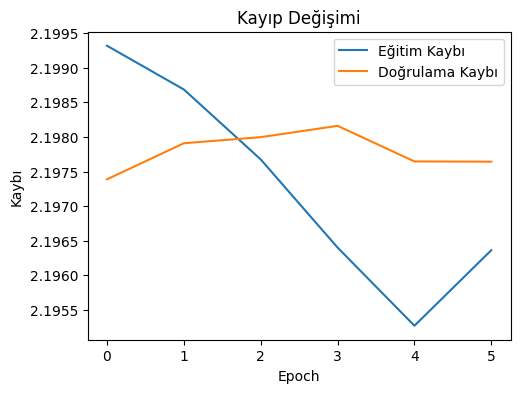

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()